In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind, kendalltau
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('stud_math.csv')

## Часть вторая.  Категориальная

In [5]:
# Разделим колонки по типам переменных, содержащихся в них.

cat_cols = df.columns[df.dtypes == 'O'].to_list()
num_cols_y = df.columns[df.dtypes == 'float64'].to_list()
num_cols = num_cols_y.remove('score')

In [12]:
#Отберем категориальные признаки в которых есть значение 'other'
cat_cols_not_bin = []
for it in cat_cols:
    if 'other' in df[it].values:
        cat_cols_not_bin.append(it)
print(cat_cols_not_bin)

['Mjob', 'Fjob', 'reason', 'guardian']


 Для этих признаков заменим **пропуски** значением **'other'** как наиболее подходящее по смыслу.

In [16]:
df[cat_cols_not_bin] = df[cat_cols_not_bin].fillna('other')

In [5]:
df_cat_y = df.drop(num_cols, axis=1)
df_cat_y = df_cat_y.dropna(subset=['score', ])
df_cat_y = df_cat_y.fillna('other')
y = df_cat_y.score.ravel()
X = df_cat_y.drop('score', axis=1)
X_enc = OrdinalEncoder().fit_transform(X)

In [6]:
y[y == 0] = y.mean()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X_enc, y, test_size=0.2, random_state=88)

In [18]:
X_train[:,8:12].shape

(311, 4)

In [30]:
lgb_ds = lgb.Dataset(X_train, label=y_train)

In [31]:
# specify your configurations as a dict
params = {
    'boosting_type': 'rf',
    'feature_fraction': 0.3,
    'bagging_fraction': 0.5,
    'fraction_freq': 1,
    'bagging_freq': 1
}

In [32]:
gbm = lgb.train(params, lgb_ds)

In [33]:
gbm.feature_importance()

array([ 1, 37, 67, 18, 22,  0, 27, 19, 49,  9, 27, 29, 34, 26, 11,  0, 11,
       22])

In [34]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

In [35]:
print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)

The rmse of prediction is: 15.929618354452998


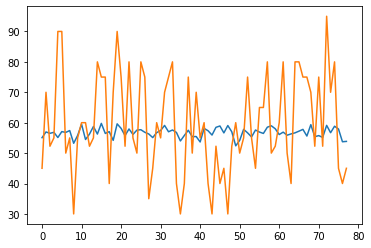

In [36]:
plt.plot(y_pred)
plt.plot(y_test)